# Linear regression by gradient descent 
Math 395 Learning from Large Data Sets 

Fall 2024, Hope College

## import libraries

In [1]:
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import cm

## simulate a data set (single feature)

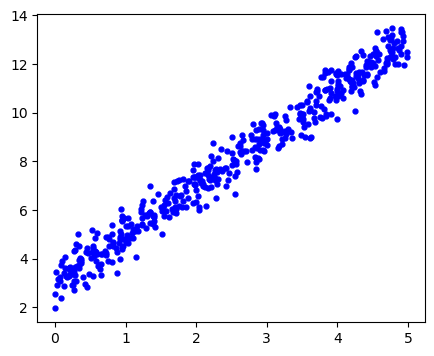

In [2]:
n_1 = 500 # number of examples

x = np.random.uniform(0,5,n_1); # feature
x = np.sort(x); 

y = 3 + 2 * x  # true beta0 = 3, true beta1 = 2
y = y + 0.5 * np.random.randn(n_1)  # add Gaussian noise

x = np.reshape(x,[-1,1]) # change to column form
y = np.reshape(y,[-1,1])

plt.figure(figsize=(5,4))
plt.plot(x,y,'b.', markersize=7)

## linear regression by the exact method

[3.02862033] [[1.98911291]]


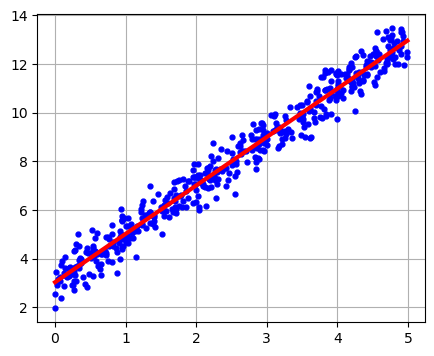

In [3]:
LRmodel = LinearRegression().fit(x, y)  # fit a linear reg model with intercept

beta0 = LRmodel.intercept_    # beta_0
beta1 = LRmodel.coef_         # beta_1

print(beta0,beta1)

yhat = LRmodel.predict(x)     # fitted values

plt.figure(figsize=(5,4))
plt.plot(x,y,'b.', markersize=7)
plt.plot(x,yhat,'r-', linewidth=3)
plt.grid('on')

## (1) Display level sets of the objective function (training MSE). Remember to set the limits of the variables by centering around their true values

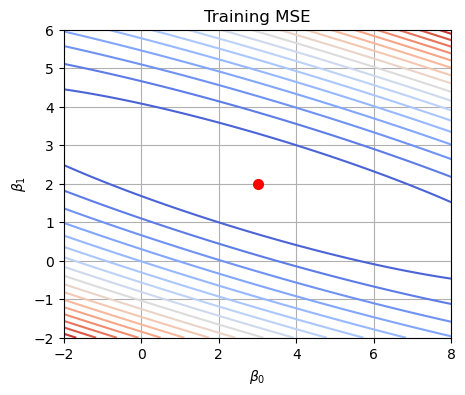

In [4]:
n = 300

beta0 = np.linspace(-2,8,n)
beta1 = np.linspace(-2,6,n)
B0, B1 = np.meshgrid(beta0, beta1)

MSE = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        yhat = B0[i,j] + B1[i,j] * x
        MSE[i,j] = np.mean((y - yhat)**2)

plt.figure(figsize=(5,4))
plt.contour(B0, B1, MSE, 20, cmap=cm.coolwarm)
plt.plot(3,2,'ro', markersize=7)
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.title('Training MSE')
plt.grid('on')

## (2) Implement linear regression by gradient descent, try different values for the learning rate parameter $\eta$ (such as 0.05, 0.1, 0.2) and display the f-convergence curves. When the curve converges, what should the limit of the curve be?

In [5]:
def linear_regression_gradient_descent(x:np.array, y, beta, eta, n_iterations):
    n = x.shape[0]
    MSE = np.zeros(n_iterations)
    # beta0 = np.zeros(n_iterations)
    # beta1 = np.zeros(n_iterations)

    MSE[0] = (1/n) * LA.norm((y - x.dot(beta)))**2
    # beta0[0] = beta[0]
    
    for iteration in range(1, n_iterations):
        gradients = -2/n * x.T.dot(y - x.dot(beta))
        beta = beta - eta * gradients
        yhat = x.dot(beta)

        # beta[iteration] = beta
        MSE[iteration] = (1/n) * LA.norm((y - yhat))**2
    return beta, MSE

In [ ]:
def linear_regression_gradient_descent2(x:np.array, y, beta0, beta1, eta, n_iterations):
    n = x.shape[0]
    MSE = np.zeros(n_iterations)
    # beta0 = np.zeros(n_iterations)
    # beta1 = np.zeros(n_iterations)

    MSE[0] = (1/n) * LA.norm((y - x.dot(beta)))**2
    # beta0[0] = beta[0]
    
    for iteration in range(1, n_iterations):
        gradients = -2/n * x.T.dot(y - x.dot(beta))
        beta = beta - eta * gradients
        yhat = x.dot(beta)

        # beta[iteration] = beta
        MSE[iteration] = (1/n) * LA.norm((y - yhat))**2
    return beta, MSE

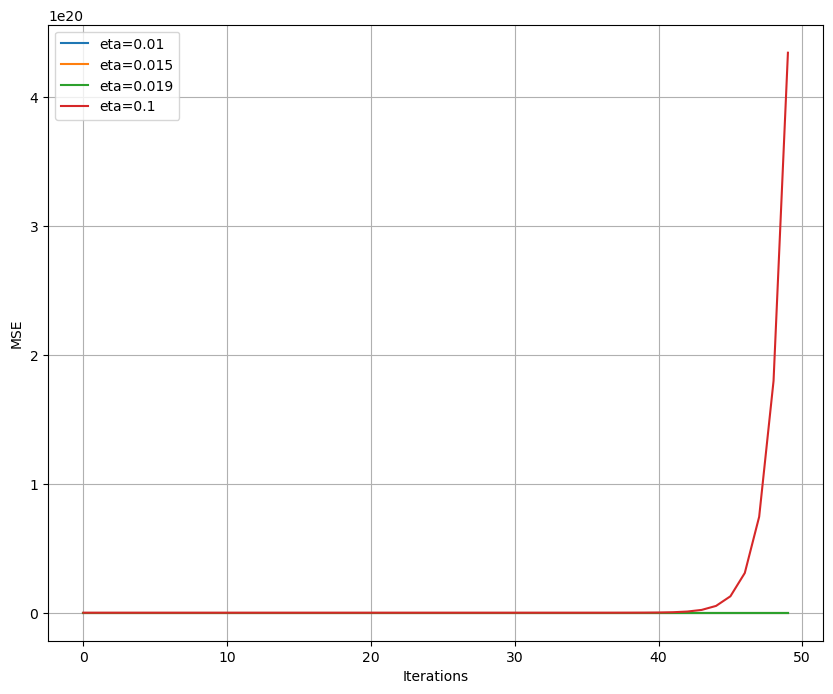

In [12]:
x = np.hstack((np.ones((n_1,1)), x)) # add a column of ones to x

n_iterations = 50

plt.figure(figsize=(10,8))
beta_0 = np.zeros((x.shape[1],1))

eta = 0.01
beta1, mse1 = linear_regression_gradient_descent(x, y, beta_0, eta, n_iterations)
plt.plot(range(n_iterations), mse1, label=f'eta={eta}')

eta = 0.015
beta2, mse2 = linear_regression_gradient_descent(x, y, beta_0, eta, n_iterations)
plt.plot(range(n_iterations), mse2, label=f'eta={eta}')

eta = 0.019
beta3, mse3 = linear_regression_gradient_descent(x, y, beta_0, eta, n_iterations)
plt.plot(range(n_iterations), mse3, label=f'eta={eta}')

eta = 0.1
beta4, mse4 = linear_regression_gradient_descent(x, y, beta_0, eta, n_iterations)
plt.plot(range(n_iterations), mse4, label=f'eta={eta}')

plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.grid('on')
plt.show()

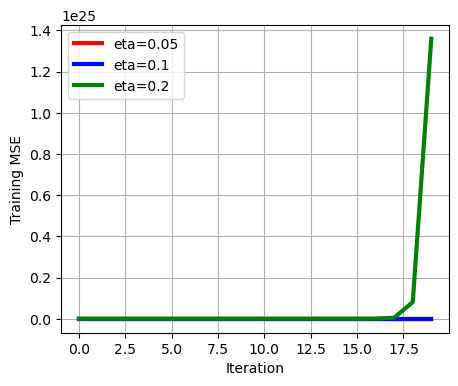

In [7]:
def gradient_descent(x:np.array, y:np.array, eta, n_iter):
    f = np.zeros(n_iter)
    beta0 = np.ones(n_iter)
    beta1 = np.ones(n_iter)
    n = x.shape[0]
    for i in range(n_iter):
        yhat = beta0[i-1] + beta1[i-1] * x
        # print(f"yhat: {yhat}\nbeta0: {beta0[i]}\nbeta1: {beta1[i]}\n")
        f[i] = (1/n) * LA.norm((y-yhat))**2
        beta0[i] = beta0[i-1] - eta * (2/n) * np.sum(yhat - y)
        beta1[i] = beta1[i-1] - eta * (2/n) * np.sum((yhat - y) * x)
    return beta0, beta1, f

n_iter = 20

x = np.hstack((np.ones((n_1,1)), x))

eta = 0.05
beta0, beta1, f1 = gradient_descent(x, y, eta, n_iter)

eta = 0.1
beta0, beta1, f2 = gradient_descent(x, y, eta, n_iter)

eta = 0.2
beta0, beta1, f3 = gradient_descent(x, y, eta, n_iter)

plt.figure(figsize=(5,4))
plt.plot(f1,'r-', linewidth=3, label='eta=0.05')
plt.plot(f2,'b-', linewidth=3, label='eta=0.1')
plt.plot(f3,'g-', linewidth=3, label='eta=0.2')
plt.xlabel('Iteration')
plt.ylabel('Training MSE')
plt.legend()
plt.grid('on')



## (3) Display the trajectory of gradient descent on top of level sets, for the different values of $\eta$

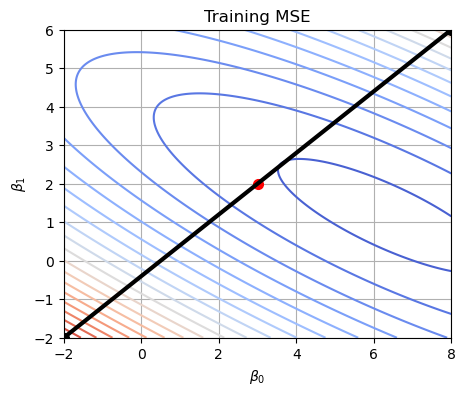

In [9]:
# Display the trajectory of gradient descent on top of level sets, for the different values of $\eta$

plt.figure(figsize=(5,4))
plt.contour(B0, B1, MSE, 20, cmap=cm.coolwarm)
plt.plot(3,2,'ro', markersize=7)
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')
plt.title('Training MSE')
plt.grid('on')
plt.plot(beta0, beta1, 'k-', linewidth=3)
plt.plot(beta0[0], beta1[0], 'ko', markersize=7)
plt.plot(beta0[-1], beta1[-1], 'ko', markersize=7)
plt.show()

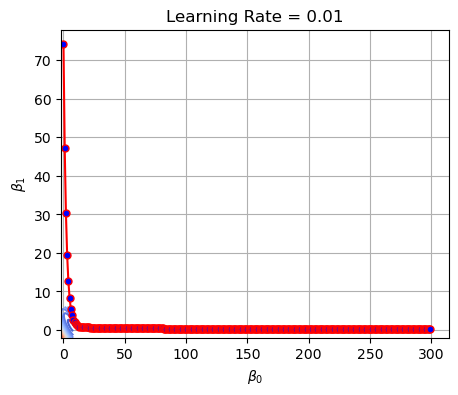

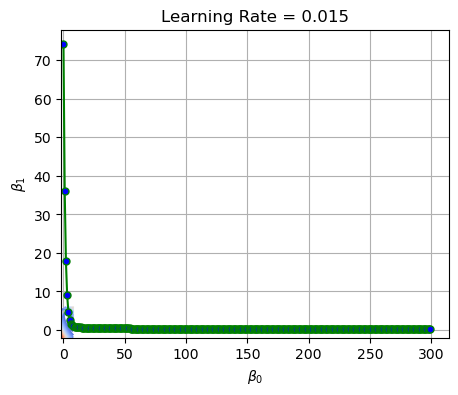

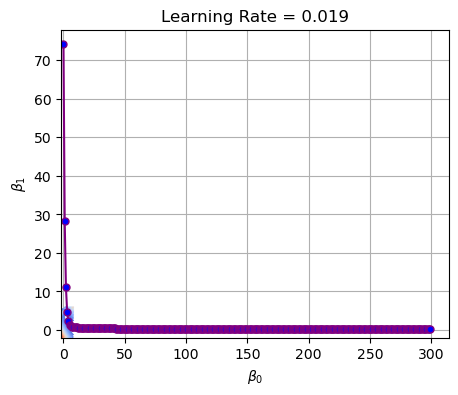

In [8]:
beta0 = np.linspace(-2,8,n)
beta1 = np.linspace(-2,6,n)
B0, B1 = np.meshgrid(beta0, beta1)

MSE = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        yhat = B0[i,j] + B1[i,j] * x
        MSE[i,j] = np.mean((y - yhat)**2)

learning_rates = [0.01, 0.015, 0.019]
colors = ['red', 'green', 'purple']
n_iter = 300

beta_0 = np.zeros((x.shape[1],1))

for i, color in zip(learning_rates, colors):
    beta, mse = linear_regression_gradient_descent(x, y, beta_0, i, n_iter)
    # print(beta)
    plt.figure(figsize=(5,4))
    plt.contour(B0, B1, MSE, 20, cmap=cm.coolwarm)
    plt.plot(range(n_iter), mse, 'o-', markersize=5, markerfacecolor='blue', color=color)
    plt.xlabel(r'$\beta_0$')
    plt.ylabel(r'$\beta_1$')
    plt.title('Learning Rate = ' + str(i))
    plt.grid('on')


## (4) Display the fitted lines (on top of data) at every step of gradient descent, with the best learning rate found above

## (5) Implement the backtracking line search method (https://www.cs.cmu.edu/~ggordon/10725-F12/slides/05-gd-revisited.pdf) for using adapative learning rates at different steps, and redo parts (2)-(4). Does it seem to improve the speed of convergence over a constant learning rate?

## (6) Implement stochastic gradident descent (with a fixed learning rate) and make the same plots as in Parts (2)-(4).
